In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell

In [3]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# pands의 plot으로 데이터 시각화 

### 1. 범주형 데이터 시각화 
- **`막대그래프, 파이그래프`**

In [4]:
# 타이타닉 데이터 이용 
titanic = pd.read_csv('데이터분석&시각화/workspace/pandas/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### 1) 막대그래프(bar)

In [6]:
#타이타닉호 승객의 사망 / 생존 빈도
s=titanic.Survived.value_counts()
s

0    549
1    342
Name: Survived, dtype: int64

In [7]:
s.index=['사망', '생존']
s

사망    549
생존    342
Name: Survived, dtype: int64

<AxesSubplot:>

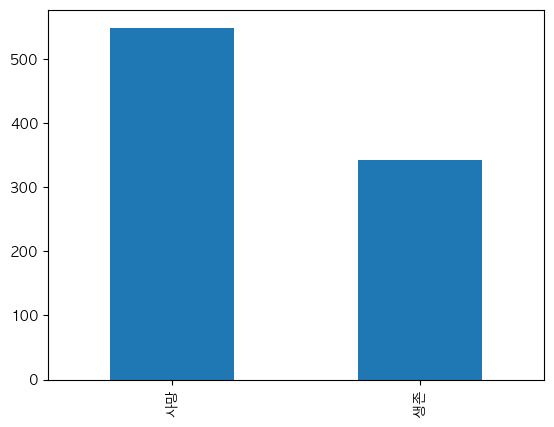

In [8]:
#수직 막대바
s.plot.bar()

<AxesSubplot:>

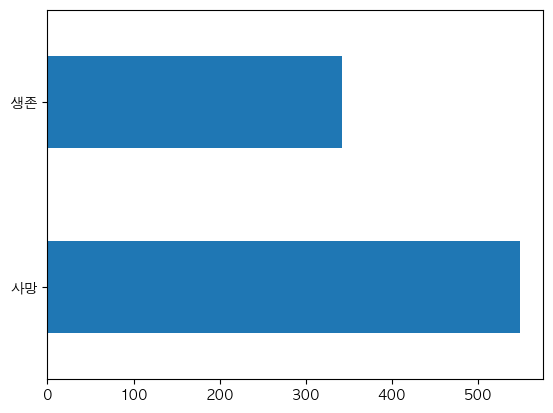

In [9]:
#수평 막대바
s.plot.barh()

In [10]:
#타이타닉호 승객의 사망/생존 비율
s2=np.round(titanic.Survived.value_counts(normalize=True)*100,2)
s2
s2.index=['사망', '생존']

<AxesSubplot:>

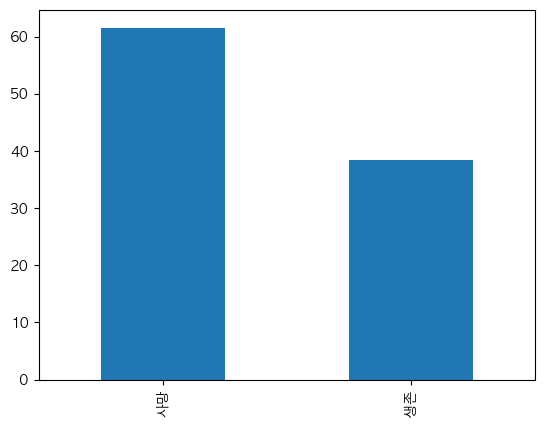

In [11]:
s2.plot.bar()

<AxesSubplot:>

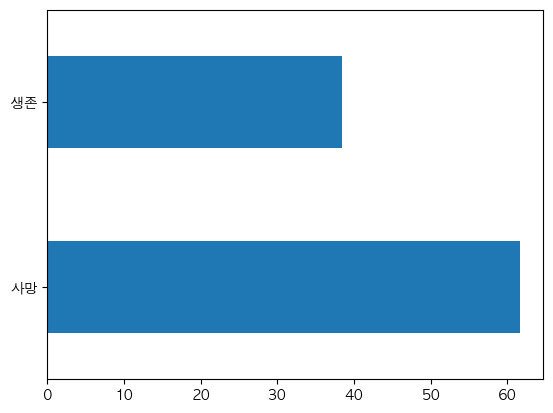

In [12]:
s2.plot.barh()

In [13]:
#타이타닉호 승객의 성별에 따른 사망/생존
s3=titanic[['Sex', 'Survived']].value_counts().sort_index()
s3

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [14]:
s4=s3.unstack(level=1)
s4

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Sex'>

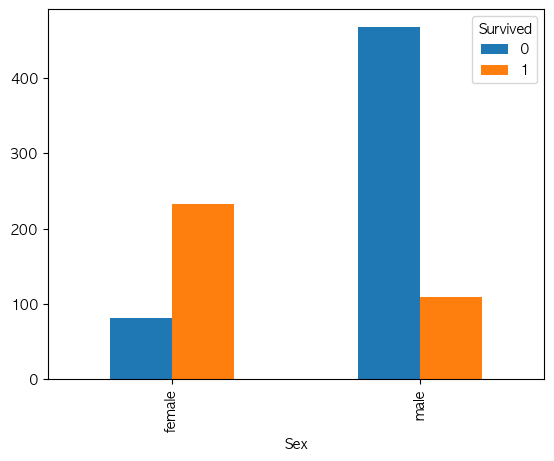

In [15]:
s4.plot.bar()

<AxesSubplot:xlabel='Sex'>

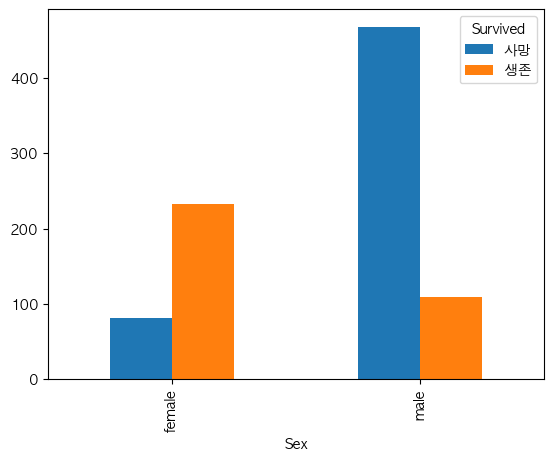

In [16]:
s4.rename(columns={0:'사망', 1:'생존'}, inplace=True)
s4.plot.bar()

<AxesSubplot:ylabel='Sex'>

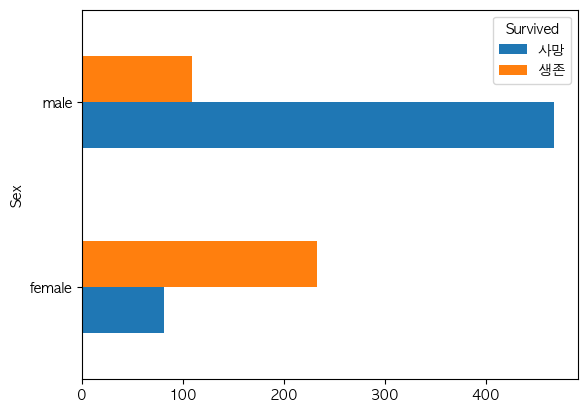

In [17]:
s4.plot.barh()

<AxesSubplot:xlabel='Sex'>

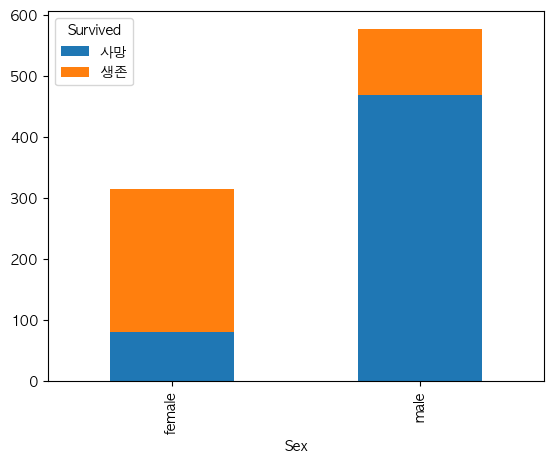

In [18]:
s4.plot.bar(stacked=True)

In [19]:
#비율로 바꾸기 
s5=titanic[['Sex','Survived']].value_counts(normalize=True).sort_index()
s5
s5=s5.unstack(level=1)
s5.rename(columns={0:'사망', 1:'생존'}, inplace=True)


<AxesSubplot:xlabel='Sex'>

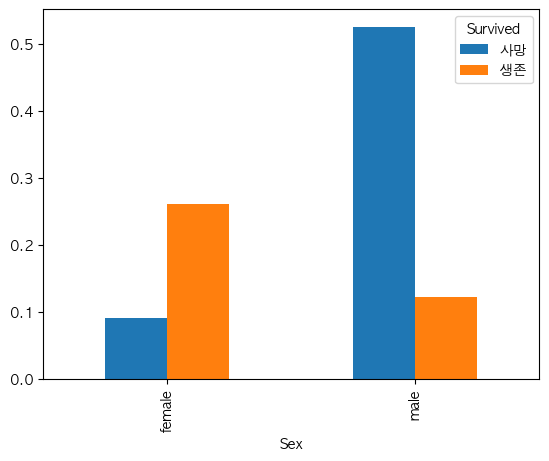

In [20]:
s5.plot.bar()

###### 2) 파이그래프(pie)

In [21]:
df=pd.DataFrame(np.random.rand(10,4), columns=['a','b','c','d'])
df

,a,b,c,d
0,0.818095,0.082911,0.266315,0.391399
1,0.965153,0.574432,0.308389,0.349316
2,0.343577,0.583465,0.779357,0.236746
3,0.399127,0.378832,0.395348,0.516226
4,0.746912,0.916955,0.827003,0.538535
5,0.818854,0.361917,0.205800,0.787220
6,0.417264,0.902671,0.796269,0.363382
7,0.466786,0.416372,0.008062,0.561436
8,0.896101,0.738080,0.625862,0.470272
9,0.822396,0.188956,0.885349,0.784724


<AxesSubplot:>

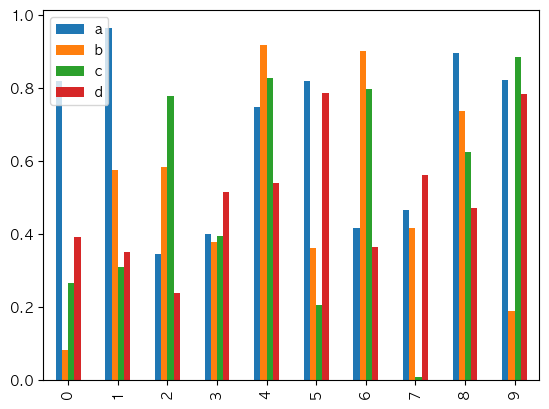

In [22]:
df.plot.bar()

<AxesSubplot:>

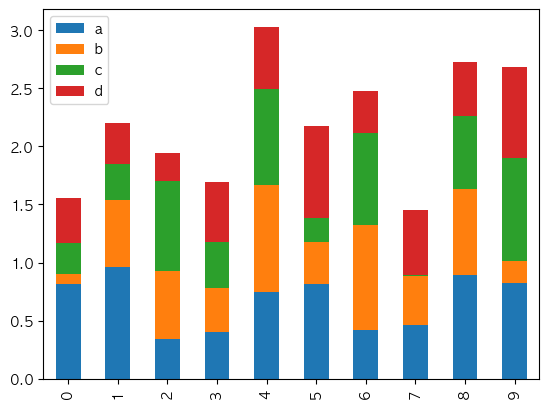

In [23]:
df.plot.bar(stacked=True)

In [24]:
# 타이타닉호 승객의 사망/생존 비율 
s

사망    549
생존    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

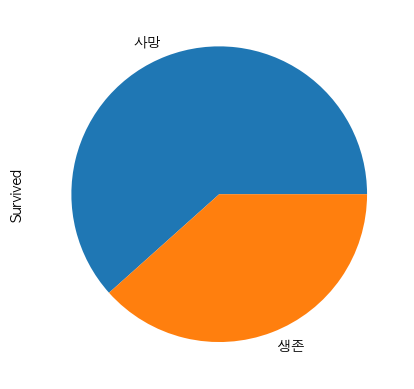

In [25]:
s.plot.pie()

In [26]:
# 시리즈 데이터 이용
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series

a    0.084056
b    1.200074
c    0.321525
d    2.269328
Name: series, dtype: float64

<AxesSubplot:ylabel='series'>

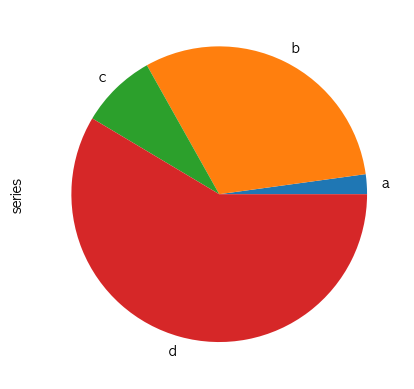

In [27]:
series.plot.pie()

<AxesSubplot:ylabel='series'>

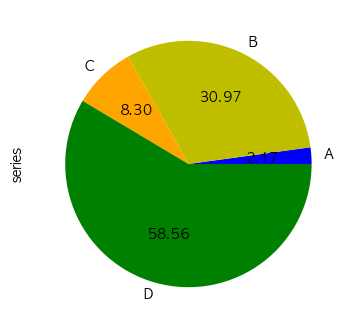

In [28]:
series.plot.pie(figsize=(4,4), colors=['b','y','orange','g'],labels=['A','B','C','D']
               , autopct='%.2f',fontsize=10)

In [29]:
# 데이터 프레임 이용 

In [30]:
df = pd.DataFrame(3 * np.random.rand(4, 2), 
                  index=["a", "b", "c", "d"], 
                  columns=["x", "y"])
df

,x,y
a,2.073723,2.681757
b,0.409133,0.584101
c,2.821231,2.877167
d,2.883139,2.518353


array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

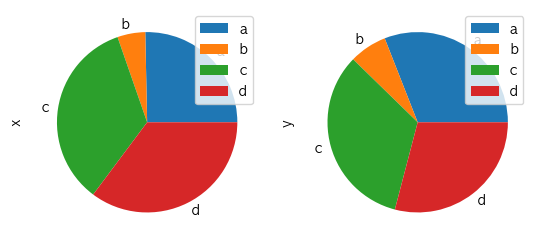

In [31]:
df.plot.pie(subplots=True)

### 2. 수치형 데이터 시각화 
- **`선그래프, 히스토그램, 박스플롯, 산점도`**

###### 1) 히스토그램(histogram)

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='Frequency'>

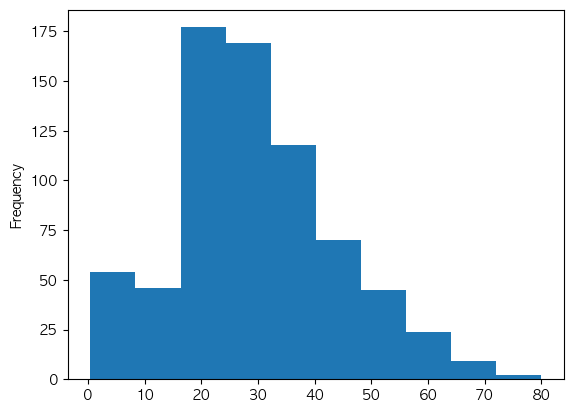

In [33]:
titanic.Age.plot.hist() #알아서 구간 나눠줌 

<AxesSubplot:ylabel='Frequency'>

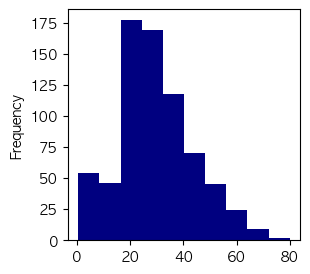

In [34]:
titanic.Age.plot.hist(figsize=(3,3), color='navy')

<AxesSubplot:ylabel='Frequency'>

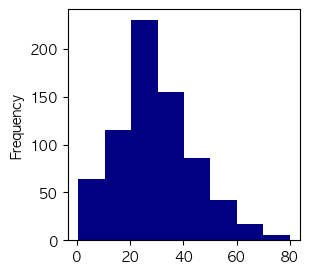

In [35]:
titanic.Age.plot.hist(figsize=(3,3), color='navy', bins=8) # 구간 조정

In [36]:
df = pd.DataFrame({"a": np.random.randn(1000) + 1, "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1}, columns=["a", "b", "c"])
df

,a,b,c
0,1.357752,-0.869860,-1.451027
1,0.291340,-0.933959,0.370737
2,2.130510,1.024697,-1.071365
3,-1.868927,0.097855,-0.124766
4,2.587140,0.313335,-2.190758
...,...,...,...
995,2.727683,-0.611932,-2.031547
996,1.902672,-0.751861,-1.750286
997,2.219818,-0.887953,-1.471146
998,1.299180,0.397156,-0.189693


<AxesSubplot:ylabel='Frequency'>

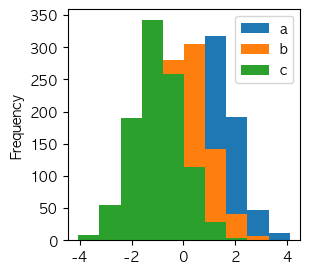

In [37]:
df.plot.hist(figsize=(3,3))

<AxesSubplot:ylabel='Frequency'>

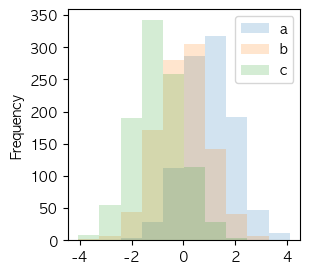

In [38]:
df.plot.hist(figsize=(3,3), alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

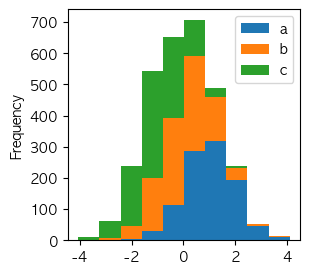

In [39]:
df.plot.hist(figsize=(3,3), stacked=True)

<AxesSubplot:xlabel='Frequency'>

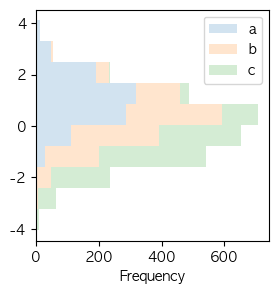

In [40]:
df.plot.hist(figsize=(3,3), stacked=True, orientation='horizontal',
            alpha=0.2)

<AxesSubplot:xlabel='Frequency'>

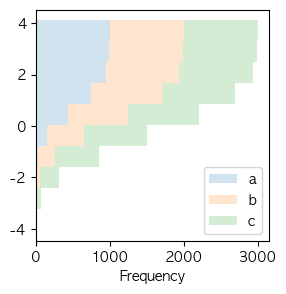

In [41]:
df.plot.hist(figsize=(3,3), stacked=True, orientation='horizontal',
            cumulative=True,alpha=0.2)

###### 2) 박스플롯(box-plot)

In [42]:
# 타이타닉호 승객의 나이 
titanic.Age.skew()

0.38910778230082704

In [43]:
titanic.Age.kurt()

0.17827415364210353

<AxesSubplot:>

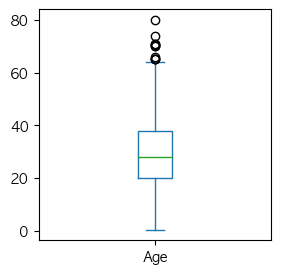

In [44]:
titanic.Age.plot(kind='box', figsize=(3,3))

In [45]:
# 데이터프레임 이용 
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df

,A,B,C,D,E
0,0.888314,0.758418,0.422944,0.467742,0.903508
1,0.816897,0.381659,0.685891,0.187122,0.344696
2,0.779545,0.609179,0.458843,0.638997,0.629402
3,0.152791,0.200940,0.570221,0.176923,0.587733
4,0.919298,0.745951,0.510837,0.360297,0.280747
5,0.987478,0.934829,0.132881,0.446097,0.066583
6,0.090292,0.918501,0.725579,0.267059,0.316219
7,0.451356,0.221336,0.654762,0.045996,0.979624
8,0.645797,0.469175,0.447511,0.540855,0.325256
9,0.501166,0.264810,0.038534,0.387091,0.787529


<AxesSubplot:>

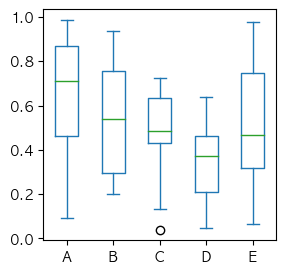

In [46]:
df.plot(kind='box', figsize=(3,3))

<AxesSubplot:>

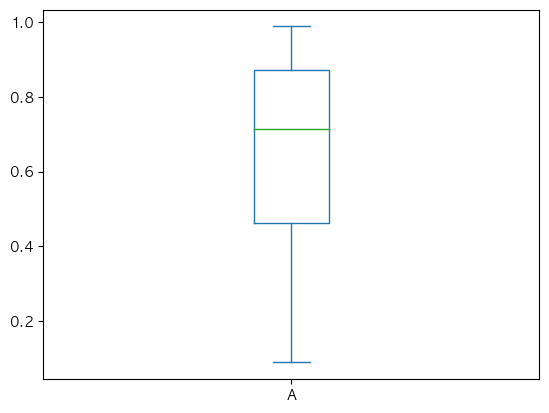

In [47]:
df['A'].plot(kind='box')

<AxesSubplot:>

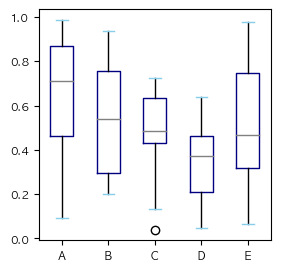

In [48]:
colors = {'boxes':'Navy', 
         'whiskers':'black',
         'medians':'Gray',
         'caps':'skyblue'}
df.plot.box(figsize=(3,3), color=colors, fontsize=8)

<AxesSubplot:>

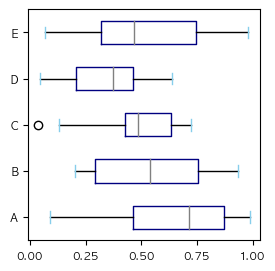

In [49]:
df.plot.box(figsize=(3,3), color=colors, fontsize=8, vert=False)

<AxesSubplot:>

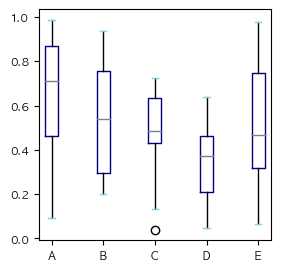

In [51]:
df.plot.box(figsize=(3,3), color=colors, fontsize=8, 
           positions=[1,3,5,7,9])

###### 3) 선그래프(line)

In [52]:
df = pd.DataFrame({'경유' : [2100, 2050, 2000, 2010, 2150, 2090],
                    '휘발유': [1900, 1950, 1800, 1955, 1970, 1920]},
                   index = ['1월','2월','3월','4월','5월','6월'])

<AxesSubplot:>

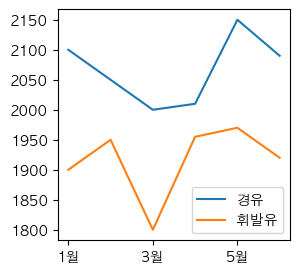

In [54]:
df.plot(figsize=(3,3))

<AxesSubplot:>

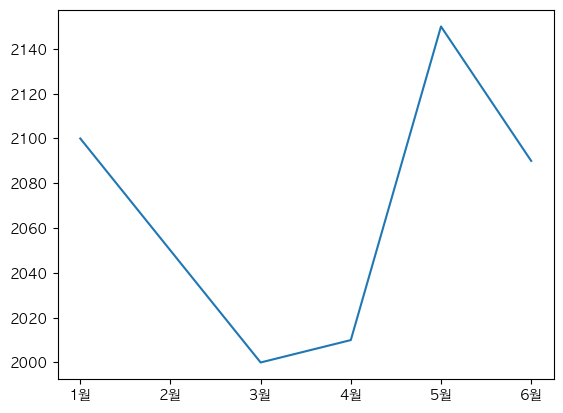

In [55]:
df['경유'].plot()

###### 4) 산점도(scatterplot)
- 산점도 : 두 변수간의 상관성 (두 수치형 데이터 간에 어떤 관계성이 있는지)

In [57]:
data = {'height' : [165, 177, 160, 180, 185, 155, 172],
        'weight' : [62, 67, 55, 74, 90, 43, 64]}
df = pd.DataFrame(data)
df

,height,weight
0,165,62
1,177,67
2,160,55
3,180,74
4,185,90
5,155,43
6,172,64


<AxesSubplot:xlabel='height', ylabel='weight'>

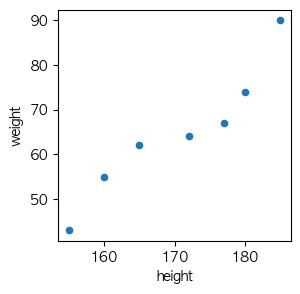

In [58]:
df.plot.scatter(x='height', y='weight', figsize=(3,3))

In [59]:
df2 = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

#50행 4열. 
df2["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
)
df2


,a,b,c,d,species
0,0.314658,0.116533,0.822592,0.464873,setosa
1,0.470444,0.337275,0.289443,0.212776,setosa
2,0.859224,0.805028,0.576100,0.201029,setosa
3,0.978189,0.436968,0.619174,0.228443,setosa
4,0.588112,0.676557,0.097033,0.519852,setosa
5,0.869353,0.607802,0.188782,0.487166,setosa
6,0.209111,0.968905,0.961950,0.179594,setosa
7,0.508443,0.367025,0.195536,0.308805,setosa
8,0.161244,0.413030,0.366687,0.630214,setosa
9,0.168577,0.440296,0.944115,0.100102,setosa


<AxesSubplot:xlabel='a', ylabel='b'>

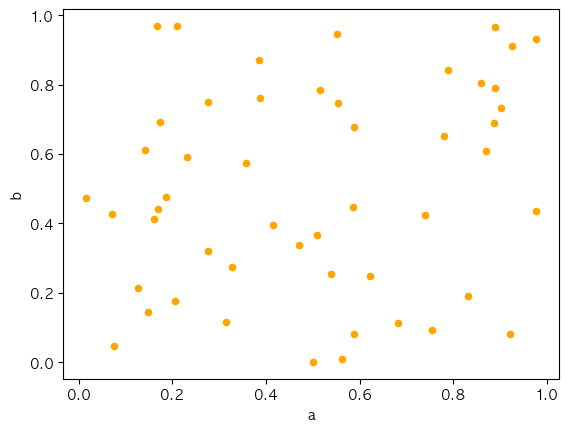

In [60]:
df2.plot.scatter(x='a',y='b', color='orange')

In [61]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [62]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

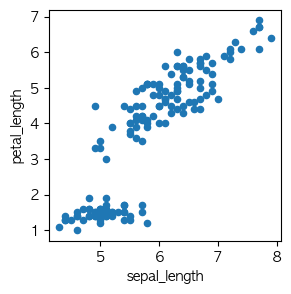

In [63]:
iris.plot.scatter(x='sepal_length', y='petal_length', figsize=(3,3))

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

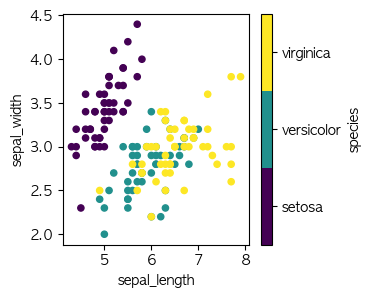

In [65]:
iris.species=iris.species.astype('category')
iris.plot.scatter(x='sepal_length', y='sepal_width', 
                 c='species', figsize=(3,3), cmap='viridis')